# Sentiment Analysis of Movie Reviews

## Importing libraries

In [1]:
# Core Data Handling
import pandas as pd
import numpy as np


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Deep Learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences  # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D  # type: ignore
from tensorflow.keras.callbacks import EarlyStopping  # type: ignore

# Text Preprosssing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Loading Dataset

In [3]:
class dataloader:
  def __init__(self, file_path):
    self.file_path = file_path
    self.data = None

  def load_data(self):
      try:
        self.data = pd.read_csv(self.file_path, on_bad_lines='skip')
        print(f"Dataset loaded successfully with {len(self.data)} rows and {len(self.data.columns)} columns")
        return self.data

      except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

  def explore_data(self):
    if self.data is not None:
      print("Data Exploration:")
      print(self.data.head())
      print("\nData Information:")
      print(self.data.info())
      print("\nData Description:")
      print(self.data.describe())
    else:
      print("No data available for exploration.")

  def visualization(self):
    if self.data is not None:
      plt.figure(figsize=(10, 6))
      self.data['sentiment'].value_counts().plot(kind='bar')
      plt.xlabel('Sentiment')
      plt.ylabel('Count')
      plt.title('Sentiment Distribution')
      plt.show()
    else:
      print("No data available for visualization.")

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\sr\AppData\Local\Temp\ipykernel_4500\2275720481.py:1: SyntaxWarning: invalid escape sequence '\I'
  data_loader = dataloader("dataset\IMDB Dataset.csv")


Dataset loaded successfully with 50000 rows and 2 columns
Data Exploration:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

Data Description:
                                                   review sentiment
count                                               50000     50000
unique                                              49582    

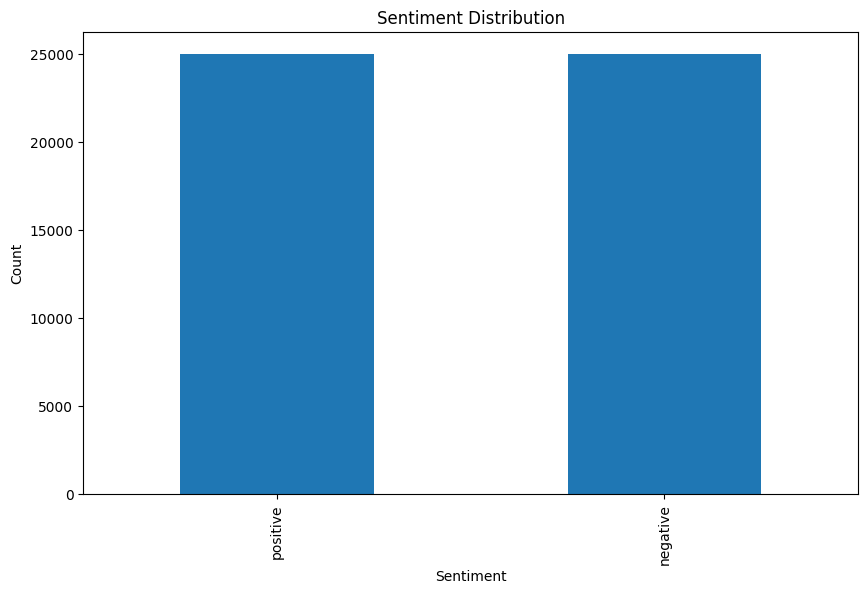

In [4]:
data_loader = dataloader("dataset\IMDB Dataset.csv")
df = data_loader.load_data()
data_loader.explore_data()
data_loader.visualization()

## Text Preprocessing

In [7]:
class TextPreprocessing:
  def __init__(self):
    self.stemmer = PorterStemmer()
    self.lemmatizer = WordNetLemmatizer()
    self.stop_words = set(stopwords.words('english'))

  def clean_text(self, text):
        """Comprehensive text cleaning function"""
        if not isinstance(text, str):
            return ""
        # Convert to lowercase
        text = text.lower()

        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)

        # Remove URLs
        text = re.sub(r'http\S+', '', text)

        # Remove punctuation and special characters
        text = re.sub(r'[^\w\s]', '', text)

         # Remove numbers
        text = re.sub(r'\d+', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

  def tokenize_text(self, text):
        """Tokenize text into words"""
        return word_tokenize(text)


  def remove_stopwords(self, tokens):
        """Remove stopwords from tokenized text"""
        return [token for token in tokens if token not in self.stop_words]

  def stem_tokens(self, tokens):
        """Apply stemming to tokens"""
        return [self.stemmer.stem(token) for token in tokens]

  def lemmatize_tokens(self, tokens):
        """Apply lemmatization to tokens"""
        return [self.lemmatizer.lemmatize(token) for token in tokens]

  def preprocess_pipeline(self, text, use_lemmatization=True):
        """Complete text preprocessing pipeline"""
        # Clean text
        cleaned_text = self.clean_text(text)

        # Tokenize
        tokens = self.tokenize_text(cleaned_text)

        # Remove stopwords
        tokens = self.remove_stopwords(tokens)

        # Apply lemmatization or stemming
        if use_lemmatization:
            tokens = self.lemmatize_tokens(tokens)
        else:
            tokens = self.stem_tokens(tokens)

        # Join back to string
        processed_text = ' '.join(tokens)

        return processed_text


In [8]:
# Apply preprocessing to the dataset
preprocessor = TextPreprocessing()

if df is not None:
    print("Starting text preprocessing...")
    df['cleaned_review'] = df['review'].apply(preprocessor.preprocess_pipeline)
    print("Text preprocessing completed!")
else:
    print("DataFrame is None. Cannot perform text preprocessing.")

Starting text preprocessing...
Text preprocessing completed!


In [9]:
# Display before and after examples
print("\n=== Original vs Cleaned Text Examples ===")
for i in range(3):
    print(f"Original: {df['review'].iloc[i][:100]}...")
    print(f"Cleaned: {df['cleaned_review'].iloc[i][:100]}...")
    print("-" * 50)


=== Original vs Cleaned Text Examples ===
Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. The...
Cleaned: one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing str...
--------------------------------------------------
Original: A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-B...
Cleaned: wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometime...
--------------------------------------------------
Original: I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air con...
Cleaned: thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthe...
--------------------------------------------------


## Handling Missing Values


In [10]:
def handle_data_quality(df):
    """Handle data quality issues"""
    print("=== Data Quality Check ===")
    print(f"Initial shape: {df.shape}")

    # Check for missing values
    missing_values = df.isnull().sum()
    print(f"Missing values:\n{missing_values}")

    # Remove rows with missing values
    df_clean = df.dropna()
    print(f"After removing missing values: {df_clean.shape}")

    # Remove duplicates
    df_clean = df_clean.drop_duplicates(subset=['cleaned_review'])
    print(f"After removing duplicates: {df_clean.shape}")

    # Verify sentiment labels
    print(f"Unique sentiment labels: {df_clean['sentiment'].unique()}")

    return df_clean

df_clean = handle_data_quality(df)

=== Data Quality Check ===
Initial shape: (50000, 3)
Missing values:
review            0
sentiment         0
cleaned_review    0
dtype: int64
After removing missing values: (50000, 3)
After removing duplicates: (49577, 3)
Unique sentiment labels: ['positive' 'negative']


##  Feature Extraction

In [ ]:
class FeatureExtractor:
    def __init__(self):
        self.vectorizer = None
        self.tokenizer = None
        self.max_features_tfidf = 20000   # For Logistic Regression
        self.max_features_lstm  = 30000   # For LSTM
        self.max_sequence_length = 200

    def prepare_tfidf_features(self, texts, ngram_range=(1, 2)):
        """Prepare TF-IDF features with n-grams"""
        self.vectorizer = TfidfVectorizer(
            max_features=self.max_features_lstm,
            ngram_range=ngram_range,
            stop_words='english',
            sublinear_tf=True,      # Helps with term frequency scaling
            min_df=2                # Ignore words in <2 docs
        )

        tfidf_features = self.vectorizer.fit_transform(texts)
        print(f"TF-IDF features shape: {tfidf_features.shape}")

        return tfidf_features

    def prepare_sequence_features(self, texts):
        """Prepare sequence features for LSTM"""
        self.tokenizer = Tokenizer(num_words=self.max_features_lstm,
        oov_token='<OOV>',
        filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',  # keep apostrophes?
        lower=True)
        self.tokenizer.fit_on_texts(texts)

        sequences = self.tokenizer.texts_to_sequences(texts)
        padded_sequences = pad_sequences(sequences, maxlen=self.max_sequence_length, padding='post')

        print(f"Vocabulary size: {len(self.tokenizer.word_index)}")
        print(f"Padded sequences shape: {padded_sequences.shape}")

        return padded_sequences

# Prepare features
feature_extractor = FeatureExtractor()

# For Logistic Regression
X_tfidf = feature_extractor.prepare_tfidf_features(df_clean['cleaned_review'])

# For LSTM
X_sequences = feature_extractor.prepare_sequence_features(df_clean['cleaned_review'])

# Prepare target variable
sentiment_mapping = {'positive': 1, 'negative': 0}
y = df_clean['sentiment'].map(sentiment_mapping)

TF-IDF features shape: (49577, 30000)
Vocabulary size: 203627
Padded sequences shape: (49577, 200)


## Train-Test Split

In [15]:
# Split data for both models
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42, stratify=y
)

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    X_sequences, y, test_size=0.3, random_state=42, stratify=y
)

print("=== Data Splits ===")
print(f"TF-IDF Train: {X_train_tfidf.shape}, Test: {X_test_tfidf.shape}")
print(f"Sequences Train: {X_train_seq.shape}, Test: {X_test_seq.shape}")
print(f"Target Train: {y_train.shape}, Test: {y_test.shape}")

=== Data Splits ===
TF-IDF Train: (34703, 30000), Test: (14874, 30000)
Sequences Train: (34703, 200), Test: (14874, 200)
Target Train: (34703,), Test: (14874,)


##  Logistic Regression Model

Training Logistic Regression model...
Logistic Regression training completed!
=== Logistic Regression Evaluation ===
Accuracy: 0.8909

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7409
           1       0.88      0.91      0.89      7465

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



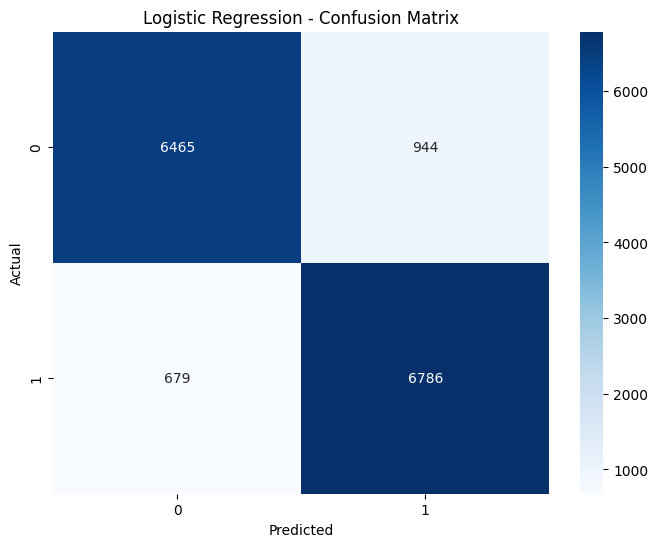

In [18]:
class LogisticRegressionModel:
    def __init__(self):
        self.model = None
        self.is_trained = False

    def train(self, X_train, y_train):
        """Train Logistic Regression model"""
        print("Training Logistic Regression model...")
        self.model = LogisticRegression(
            random_state=42,
            max_iter=1000,
            C=1.0
        )

        self.model.fit(X_train, y_train)
        self.is_trained = True
        print("Logistic Regression training completed!")

    def predict(self, X):
        """Make predictions"""
        if not self.is_trained:
            raise ValueError("Model not trained yet")
        return self.model.predict(X)

    def evaluate(self, X_test, y_test):
        """Evaluate model performance"""
        if not self.is_trained:
            raise ValueError("Model not trained yet")

        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print("=== Logistic Regression Evaluation ===")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Logistic Regression - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        return accuracy, y_pred

# Train and evaluate Logistic Regression
lr_model = LogisticRegressionModel()
lr_model.train(X_train_tfidf, y_train)
lr_accuracy, lr_predictions = lr_model.evaluate(X_test_tfidf, y_test)

## LSTM Model

LSTM model built successfully!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
868/868 ━━━━━━━━━━━━━━━━━━━━ 579s 657ms/step - accuracy: 0.5026 - loss: 0.6923 - val_accuracy: 0.5489 - val_loss: 0.6686
Epoch 2/15
868/868 ━━━━━━━━━━━━━━━━━━━━ 624s 664ms/step - accuracy: 0.5473 - loss: 0.6537 - val_accuracy: 0.5298 - val_loss: 0.6618
Epoch 3/15
868/868 ━━━━━━━━━━━━━━━━━━━━ 584s 673ms/step - accuracy: 0.5970 - loss: 0.6058 - val_accuracy: 0.8424 - val_loss: 0.3923
Epoch 4/15
868/868 ━━━━━━━━━━━━━━━━━━━━ 612s 662ms/step - accuracy: 0.8833 - loss: 0.3128 - val_accuracy: 0.8876 - val_loss: 0.2941
Epoch 5/15
868/868 ━━━━━━━━━━━━━━━━━━━━ 575s 663ms/step - accuracy: 0.9420 - loss: 0.1751 - val_accuracy: 0.8869 - val_loss: 0.3369
Epoch 6/15
868/868 ━━━━━━━━━━━━━━━━━━━━ 579s 667ms/step - accuracy: 0.9702 - loss: 0.1023 - val_accuracy: 0.8855 - val_loss: 0.3589
Epoch 7/15
868/868 ━━━━━━━━━━━━━━━━━━━━ 574s 662ms/step - accuracy: 0.9843 - loss: 0.0584 - val_accuracy: 0.8774 - val_loss: 0.4419
=== LSTM Model Evaluation ===
Test Accuracy: 0.8810
Test Loss: 0.3016


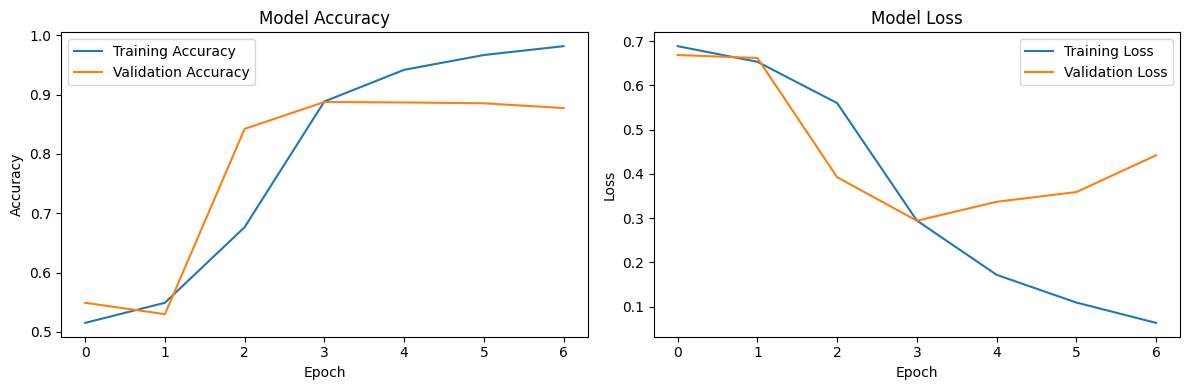

465/465 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step


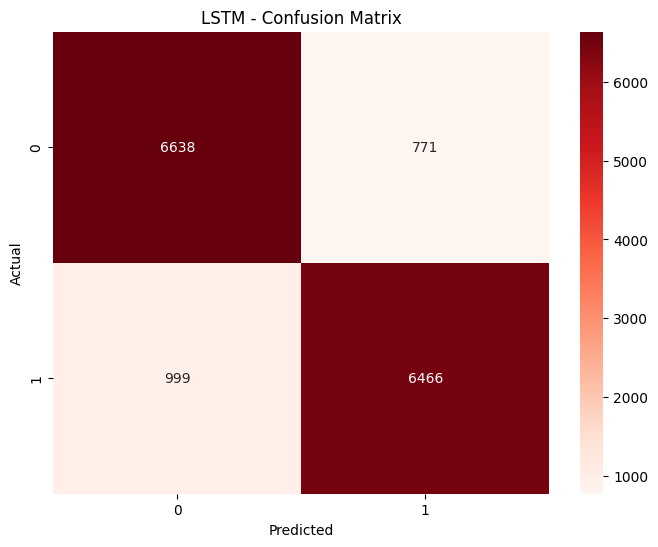


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7409
           1       0.89      0.87      0.88      7465

    accuracy                           0.88     14874
   macro avg       0.88      0.88      0.88     14874
weighted avg       0.88      0.88      0.88     14874



In [23]:
class LSTMModel:
    def __init__(self, vocab_size, max_sequence_length, embedding_dim=100):
        self.vocab_size = vocab_size
        self.max_sequence_length = max_sequence_length
        self.embedding_dim = embedding_dim
        self.model = None
        self.history = None

    def build_model(self):
        """Build LSTM model architecture"""
        self.model = Sequential([
            Embedding(
                input_dim=self.vocab_size + 1,  # +1 for OOV token
                output_dim=self.embedding_dim,
                input_length=self.max_sequence_length
            ),
            SpatialDropout1D(0.2),
            LSTM(100, dropout=0.2, recurrent_dropout=0.2),
            Dense(50, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])

        self.model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        print("LSTM model built successfully!")
        print(self.model.summary())

    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
        """Train LSTM model"""
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )

        self.history = self.model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping],
            verbose=1
        )

    def evaluate(self, X_test, y_test):
        """Evaluate LSTM model"""
        loss, accuracy = self.model.evaluate(X_test, y_test, verbose=0)

        print("=== LSTM Model Evaluation ===")
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Test Loss: {loss:.4f}")

        # Plot training history
        self.plot_training_history()

        # Confusion Matrix
        y_pred_proba = self.model.predict(X_test)
        y_pred = (y_pred_proba > 0.5).astype(int)

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
        plt.title('LSTM - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        return accuracy, y_pred

    def plot_training_history(self):
        """Plot training history"""
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['accuracy'], label='Training Accuracy')
        plt.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Build, train and evaluate LSTM
lstm_model = LSTMModel(
    vocab_size=feature_extractor.max_features_lstm,
    max_sequence_length=feature_extractor.max_sequence_length
)
lstm_model.build_model()

# Further split training data for validation
X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_seq, y_train_seq, test_size=0.2, random_state=42
)

lstm_model.train(X_train_lstm, y_train_lstm, X_val_lstm, y_val_lstm, epochs=15)
lstm_accuracy, lstm_predictions = lstm_model.evaluate(X_test_seq, y_test_seq)

## Save Trained Models

In [25]:
def save_models(lr_model, lstm_model, preprocessor, feature_extractor):
    """Save all trained models and preprocessing objects"""
    import pickle
    import joblib

    # Save Logistic Regression model
    joblib.dump(lr_model.model, 'logistic_regression_model.pkl')

    # Save LSTM model
    lstm_model.model.save('lstm_model.keras')

    # Save preprocessing objects
    with open('preprocessor.pkl', 'wb') as f:
        pickle.dump(preprocessor, f)

    with open('feature_extractor.pkl', 'wb') as f:
        pickle.dump(feature_extractor, f)

    # Save tokenizer
    with open('tokenizer.pkl', 'wb') as f:
        pickle.dump(feature_extractor.tokenizer, f)

    print("All models and objects saved successfully!")

save_models(lr_model, lstm_model, preprocessor, feature_extractor)

All models and objects saved successfully!
